### 학습목표
1. 아이템별 지표 확인하기
2. 시간별 지역별 판매 지표 확인하기

In [17]:
import numpy as np
import pandas as pd
# seaborn
import seaborn as sns
import matplotlib.pyplot as plt
COLORS = sns.color_palette()

%matplotlib inline

#### 데이터 로딩
1. 정제된 데이터 사용(retail.csv)

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
dtypes = {
    'UnitPrice': np.float32,
    'CustomerID': np.int32,
    'Quantity': np.int32
}
retail = pd.read_csv('data/OnlineRetailClean.csv', dtype=dtypes)
retail.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34


#### 날짜 타입 데이터 변환
 - 문자열로 로딩하는 것보다 date/datetime 타입으로 로딩하는 것이 분석에 용이

In [5]:
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'], infer_datetime_format=True)
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397884 entries, 0 to 397883
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Unnamed: 0     397884 non-null  int64         
 1   InvoiceNo      397884 non-null  int64         
 2   StockCode      397884 non-null  object        
 3   Description    397884 non-null  object        
 4   Quantity       397884 non-null  int32         
 5   InvoiceDate    397884 non-null  datetime64[ns]
 6   UnitPrice      397884 non-null  float32       
 7   CustomerID     397884 non-null  int32         
 8   Country        397884 non-null  object        
 9   CheckoutPrice  397884 non-null  float64       
dtypes: datetime64[ns](1), float32(1), float64(1), int32(2), int64(2), object(3)
memory usage: 25.8+ MB


/var/folders/d8/9nns59h14_z0hzcqldblr_v00000gn/T/ipykernel_11416/4238999679.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'], infer_datetime_format=True)


#### 해당 기간 동안의 매출
 - 전체 매출
 - 국가별 매출
 - 월별 매출
 - 요일별 매출
 - 시간별 매출

#### 전체 매출

In [28]:
total = retail['CheckoutPrice'].sum()
total

8911407.904

#### 국가별 매출

In [14]:
rev_by_country = retail.groupby('Country')['CheckoutPrice'].sum().sort_values(ascending=False)
rev_by_country

Country
United Kingdom          7308391.554
Netherlands              285446.340
EIRE                     265545.900
Germany                  228867.140
France                   209024.050
Australia                138521.310
Spain                     61577.110
Switzerland               56443.950
Belgium                   41196.340
Sweden                    38378.330
Japan                     37416.370
Norway                    36165.440
Portugal                  33439.890
Finland                   22546.080
Singapore                 21279.290
Channel Islands           20450.440
Denmark                   18955.340
Italy                     17483.240
Cyprus                    13590.380
Austria                   10198.680
Poland                     7334.650
Israel                     7221.690
Greece                     4760.520
Iceland                    4310.000
Canada                     3666.380
USA                        3580.390
Malta                      2725.590
Unspecified         

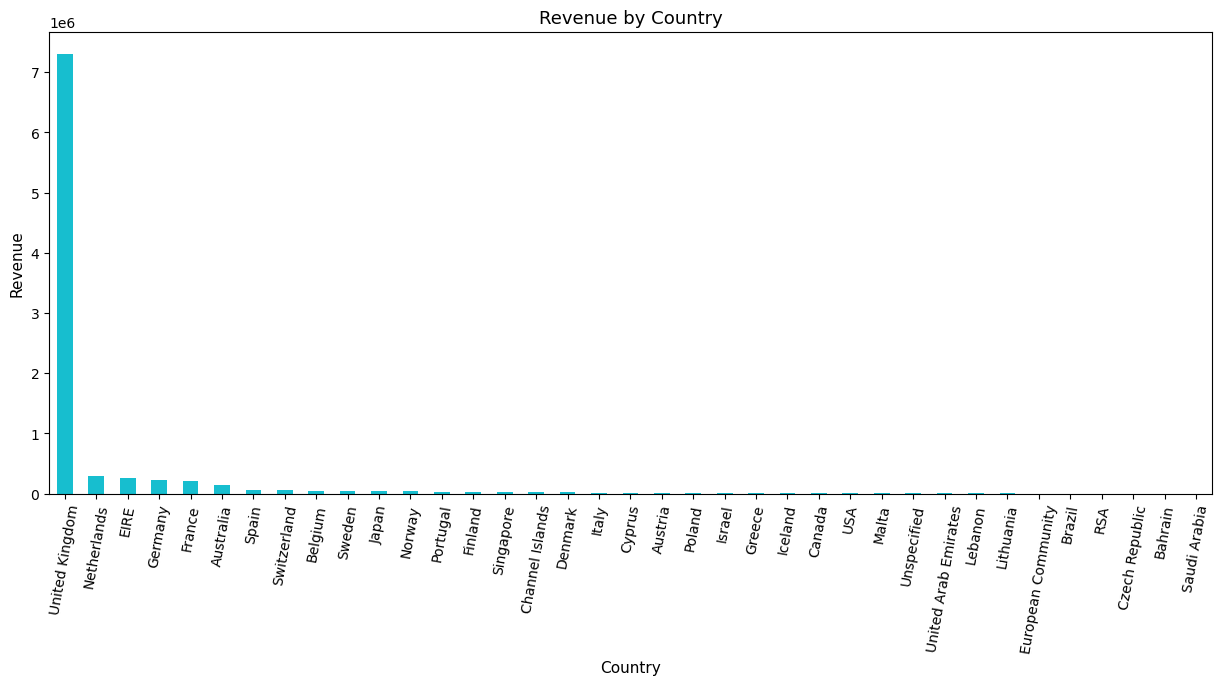

In [26]:
plot = rev_by_country.plot(kind='bar', color=COLORS[-1], figsize=(15,6))
plot.set_xlabel('Country', fontsize=11)
plot.set_ylabel('Revenue', fontsize=11)
plot.set_title('Revenue by Country', fontsize=13)
plot.set_xticklabels(labels=rev_by_country.index, rotation=80)
plt.show()

In [29]:
rev_by_country / total #영국이 전체의 82%

Country
United Kingdom          0.820116
Netherlands             0.032032
EIRE                    0.029798
Germany                 0.025682
France                  0.023456
Australia               0.015544
Spain                   0.006910
Switzerland             0.006334
Belgium                 0.004623
Sweden                  0.004307
Japan                   0.004199
Norway                  0.004058
Portugal                0.003752
Finland                 0.002530
Singapore               0.002388
Channel Islands         0.002295
Denmark                 0.002127
Italy                   0.001962
Cyprus                  0.001525
Austria                 0.001144
Poland                  0.000823
Israel                  0.000810
Greece                  0.000534
Iceland                 0.000484
Canada                  0.000411
USA                     0.000402
Malta                   0.000306
Unspecified             0.000299
United Arab Emirates    0.000213
Lebanon                 0.000190
Li

#### 그래프 유틸 함수

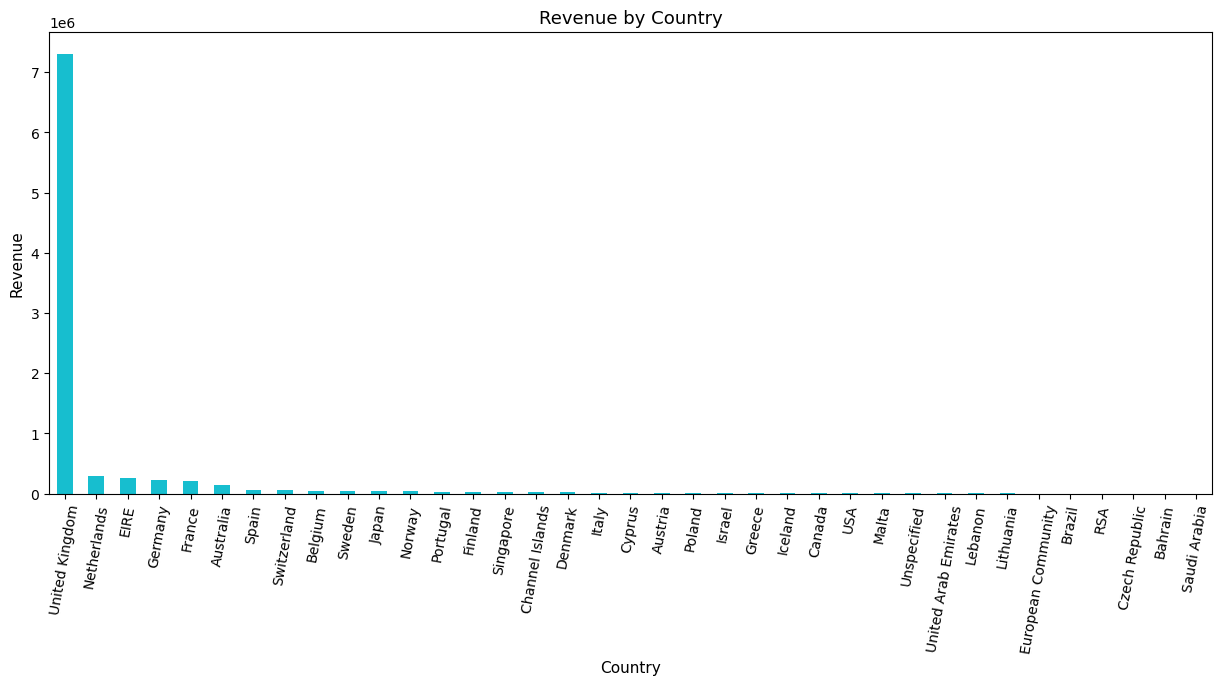

In [30]:
def plot_bar(df, xlabel, ylabel, title, color=COLORS[-1], figsize=(15,6), rotation=80):
    plot = df.plot(kind='bar', color=color, figsize=figsize)
    plot.set_xlabel(xlabel, fontsize=11)
    plot.set_ylabel(ylabel, fontsize=11)
    plot.set_title(title, fontsize=13)
    plot.set_xticklabels(labels=df.index, rotation=rotation)
    plt.show()

plot_bar(rev_by_country, 'Country', 'Revenue', 'Revenue by Country')

#### 월별 매출

In [31]:
retail.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [32]:
retail.InvoiceDate.unique()

<DatetimeArray>
['2010-12-01 08:26:00', '2010-12-01 08:28:00', '2010-12-01 08:34:00',
 '2010-12-01 08:35:00', '2010-12-01 08:45:00', '2010-12-01 09:00:00',
 '2010-12-01 09:01:00', '2010-12-01 09:02:00', '2010-12-01 09:09:00',
 '2010-12-01 09:32:00',
 ...
 '2011-12-09 12:09:00', '2011-12-09 12:16:00', '2011-12-09 12:19:00',
 '2011-12-09 12:20:00', '2011-12-09 12:21:00', '2011-12-09 12:23:00',
 '2011-12-09 12:25:00', '2011-12-09 12:31:00', '2011-12-09 12:49:00',
 '2011-12-09 12:50:00']
Length: 17282, dtype: datetime64[ns]

In [35]:
def extract_month(date):
    month = str(date.month)
    if date.month < 10:
        month = '0' + month
    return str(date.year) + month

In [37]:
# groupby에 extract_month 함수 넣어주기
rev_by_month = retail.set_index('InvoiceDate').groupby(extract_month)['CheckoutPrice'].sum()
rev_by_month

InvoiceDate
201012     572713.890
201101     569445.040
201102     447137.350
201103     595500.760
201104     469200.361
201105     678594.560
201106     661213.690
201107     600091.011
201108     645343.900
201109     952838.382
201110    1039318.790
201111    1161817.380
201112     518192.790
Name: CheckoutPrice, dtype: float64

In [39]:
retail.InvoiceDate.sort_values(ascending=False) #12/9이 마지막

397883   2011-12-09 12:50:00
397876   2011-12-09 12:50:00
397870   2011-12-09 12:50:00
397871   2011-12-09 12:50:00
397872   2011-12-09 12:50:00
                 ...        
3        2010-12-01 08:26:00
1        2010-12-01 08:26:00
5        2010-12-01 08:26:00
6        2010-12-01 08:26:00
0        2010-12-01 08:26:00
Name: InvoiceDate, Length: 397884, dtype: datetime64[ns]

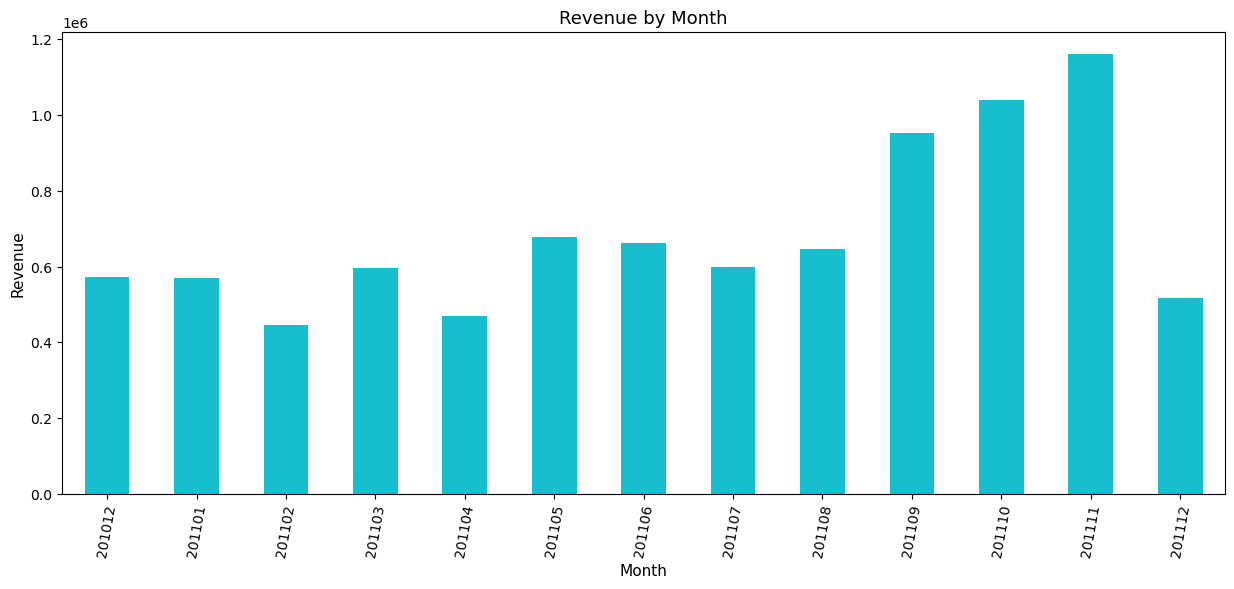

In [38]:
plot_bar(rev_by_month, 'Month', 'Revenue', 'Revenue by Month') #11월 12월이 가장 높음

#### 요일별 매출

In [43]:
rev_by_day = retail.set_index('InvoiceDate').groupby(lambda date:date.dayofweek)['CheckoutPrice'].sum()
rev_by_day

InvoiceDate
0    1367146.411
1    1700634.631
2    1588336.170
3    1976859.070
4    1485917.401
6     792514.221
Name: CheckoutPrice, dtype: float64

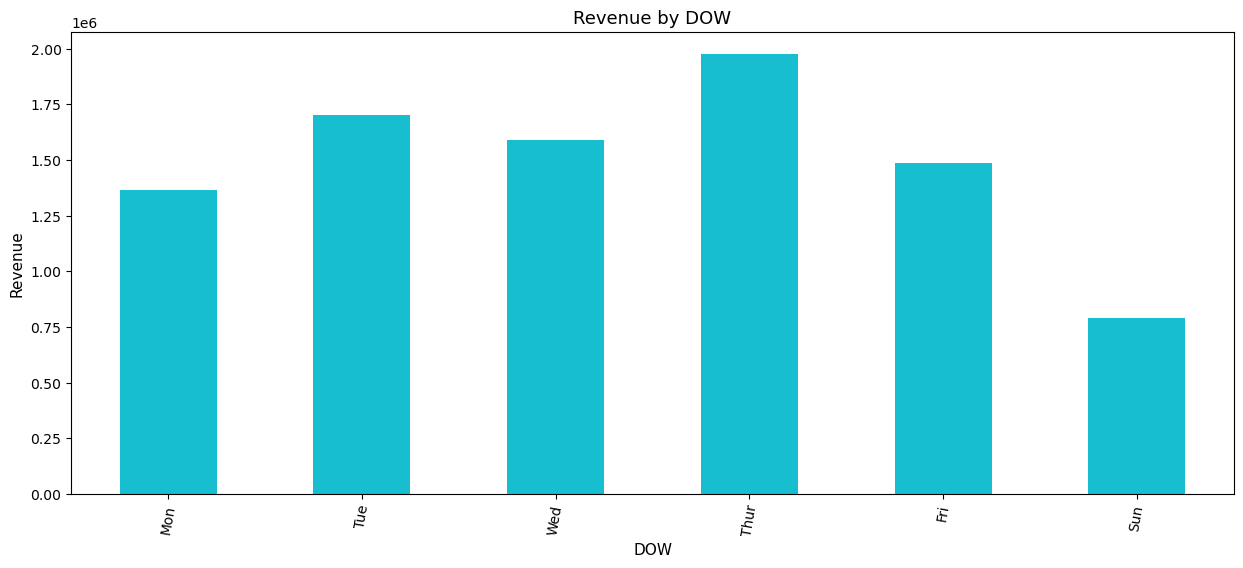

In [45]:
# 숫자 인덱스에서 요일 인덱스로 바꿔주기
Dayofweek = np.array(['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'])
rev_by_day.index = Dayofweek[rev_by_day.index]
# plot
plot_bar(rev_by_day, 'DOW', 'Revenue', 'Revenue by DOW' )
# 토요일에 매출이 없음

#### 시간별 매출

In [46]:
rev_by_hour = retail.set_index('InvoiceDate').groupby(lambda date:date.hour)['CheckoutPrice'].sum()
rev_by_hour

InvoiceDate
6           4.250
7       31059.210
8      282115.630
9      842605.171
10    1261192.571
11    1104558.750
12    1378571.480
13    1173264.750
14     995629.371
15     966191.750
16     468885.800
17     234413.521
18     104954.430
19      49028.460
20      18932.760
Name: CheckoutPrice, dtype: float64

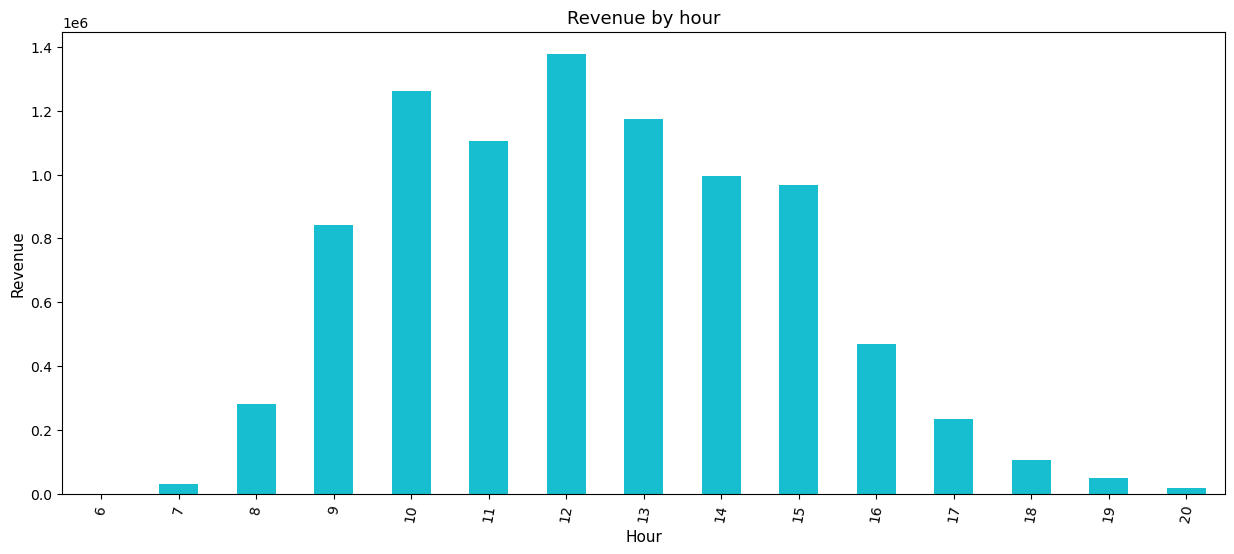

In [47]:
# plot
plot_bar(rev_by_hour, 'Hour', 'Revenue', 'Revenue by hour' )
# 12시, 1시 가장 매출이 높음

#### 매출 데이터로부터 insight
 - 전체 매출의 82%가 UK에서 발생
 - 11년도의 가장 많은 주문이 발생한 달 11월(12월의 전체 데이터가 반영이 되진 않았음)
  - 11, 12월의 판매량이 압도(블랙프라이데이, 사이버먼데이, 크리스마스 휴일)
 - 일주일중 목요일까지는 성장세를 보이다가, 이후로 하락(토요일에는 주문X)
 - 7시를 시작으로 주문이 시작되어 12시까지 증가세, 15시까지 하락을, 15시 이후 부터 급락)

#### 제품별 metrics
 - Top 10 판매 제품
 - Top 10 매출 제품

In [48]:
top_sell = retail.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False)[:10]
top_sell

StockCode
23843     80995
23166     77916
84077     54415
22197     49183
85099B    46181
85123A    36782
84879     35362
21212     33693
23084     27202
22492     26076
Name: Quantity, dtype: int32

In [54]:
top_sale = retail.groupby('StockCode')['CheckoutPrice'].sum().sort_values(ascending=False)[:10]
top_sale

StockCode
23843     168469.60
22423     142592.95
85123A    100603.50
85099B     85220.78
23166      81416.73
POST       77803.96
47566      68844.33
84879      56580.34
M          53779.93
23084      51346.20
Name: CheckoutPrice, dtype: float64

#### top 3 아이템의 월별 판매량 추이

In [57]:
top_rev = retail.groupby('StockCode')['CheckoutPrice'].sum().sort_values(ascending=False)[:3]

top3 = retail.set_index('InvoiceDate').groupby(['StockCode', 
            extract_month])[['Quantity', 'CheckoutPrice']].sum().loc[top_rev.index]
top3

Quantity  CheckoutPrice
StockCode InvoiceDate                         
23843     201112          80995      168469.60
22423     201012           1570       17756.70
          201101            946       10765.50
          201102            839        9559.65
          201103           1296       14797.40
          201104           1098       12721.50
          201105            996       11503.60
          201106            712        8229.10
          201107           1076       12225.00
          201108            775        8934.45
          201109            730        8570.13
          201110           1028       11920.65
          201111            944       11064.24
          201112            392        4545.03
85123A    201012           3611        9602.05
          201101           5467       14979.75
          201102           1823        4912.65
          201103           1918        5262.50
          201104           3725        9581.65
          201105           3846       10700.42
          201106           1618        4401.90
          201107           2971        8303.97
          201108           2046        5498.10
          201109           2444        6789.00
          201110           1650        4564.54
          201111           4861       13855.83
          201112            802        2151.14

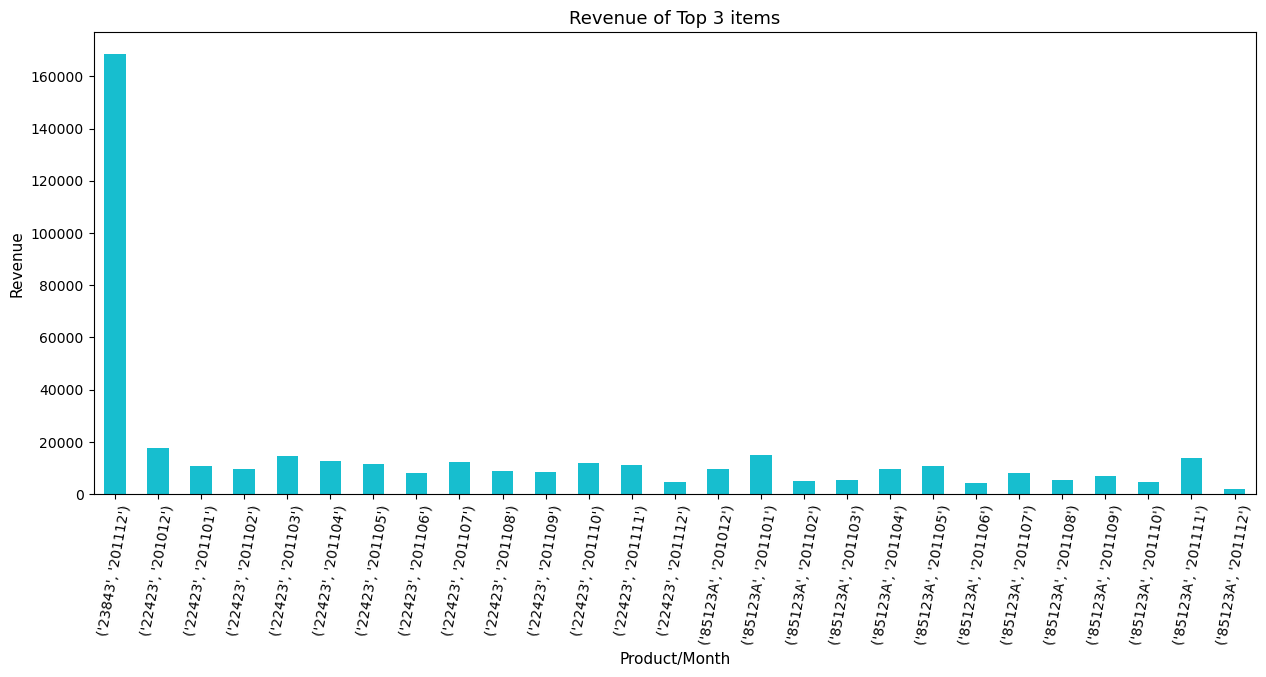

In [58]:
plot_bar(top3['CheckoutPrice'], 'Product/Month', 'Revenue', 'Revenue of Top 3 items')

---